In [23]:
import numpy as np

from astropy.modeling import models
from astropy.table import Table

import matplotlib.pyplot as plt

In [24]:
from astropy.io import fits
hdu = fits.open('example.fits')
hdu.info()

Filename: example.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (361, 361)   float32   


In [25]:
header = hdu[0].header
header

 [astropy.io.fits.verify]


SIMPLE  =                    T / written by IMCAT                               
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  361 /                                                
NAXIS2  =                  361 /                                                
BYTEORDR= 'BIG_ENDIAN'         / SunOS, solaris etc. byte order                 
EQUINOX =                 2000 / WCS --- RA/DEC equinox                         
EPOCH   =                 2000 / WCS --- obs epoch                              
CTYPE1  = 'RA---STG'           / WCS --- x coordinate type                      
CDELT1  = -1.38888888888889E-05 / WCS --- x increment per pixel (degrees)       
CRVAL1  =          189.2160408 / WCS --- RA at reference point                  
CRPIX1  =        230.290367902 /                                                
CTYPE2  = 'DEC--STG'        

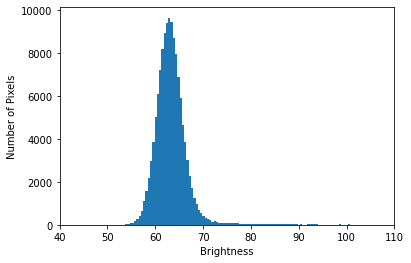

In [26]:
img = hdu[0].data
import matplotlib.pyplot as plt

# 可以使用 img.ravel() 或者 img.flatten() 將二維數據拉成一維
# plt.hist 可繪製 histogram 直方圖
plt.hist(img.ravel(), bins=1000)
# 把 y 軸的 scale 改成 log scale
#plt.yscale('log')
plt.xlabel('Brightness')
plt.ylabel('Number of Pixels')
plt.xlim([40, 110])
plt.show()

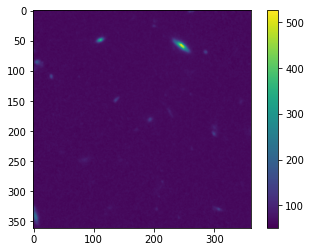

In [28]:
plt.imshow(img) # cmap = hot
plt.colorbar()
plt.show()

In [29]:
np.mean(img), np.median(img), np.std(img)

(64.14061, 63.05286, 12.333438)

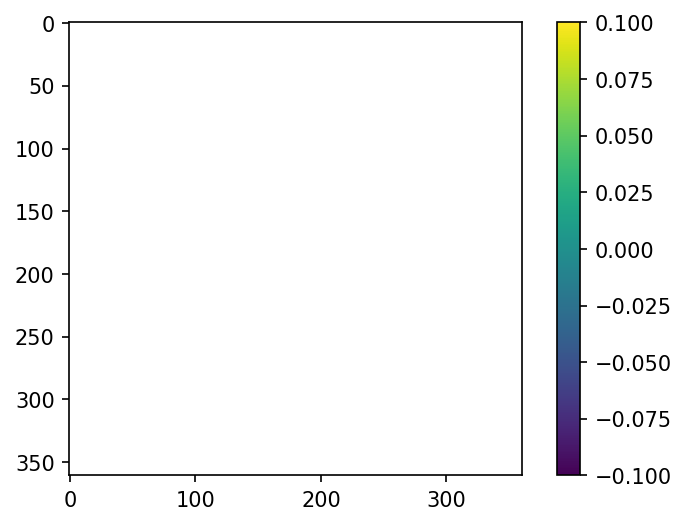

In [31]:
from photutils.segmentation import detect_sources
segment_map = detect_sources(img, threshold=3*np.mean(img), npixels=5)
mask = segment_map.make_source_mask()

masked_img = img.copy()    # 複製一份 img 到 masked_img 這個變數
masked_img[mask] = np.nan  # 將 mask 的 pixel 數值改成 NaN (Not a Number)

plt.figure(dpi=150)
#norm = simple_norm(img, stretch='sqrt', percent=99.9)
plt.imshow(masked_img, ) #origin='lower', norm=norm
plt.colorbar()
plt.show()